## Exploration of methods to aid nuclei segmentation 

Preprocessing Algorithm Before nuclei segmentation: Gray scale --> Segment image --> median blur (kernel size 11)
--> Subtract blurred image from original image --> median blur (kernel size 5) --> invert image for better visibility of nuclei

Image used: https://github.com/LieberInstitute/HumanPilot/blob/master/10X/151670/tissue_hires_image.png

In [1]:
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import pywt

In [8]:
from google.colab.patches import cv2_imshow

In [2]:
import imageio

In [3]:
import cv2 as cv

In [69]:
hires_img =  cv.imread('/content/tissue_hires_image.png')

In [71]:
hires_img.shape

(2000, 2000, 3)

In [72]:
gray_hires = cv.cvtColor(hires_img, cv.COLOR_RGB2GRAY)

In [73]:
gray_hires = gray_hires[500:1500, 500:1500]

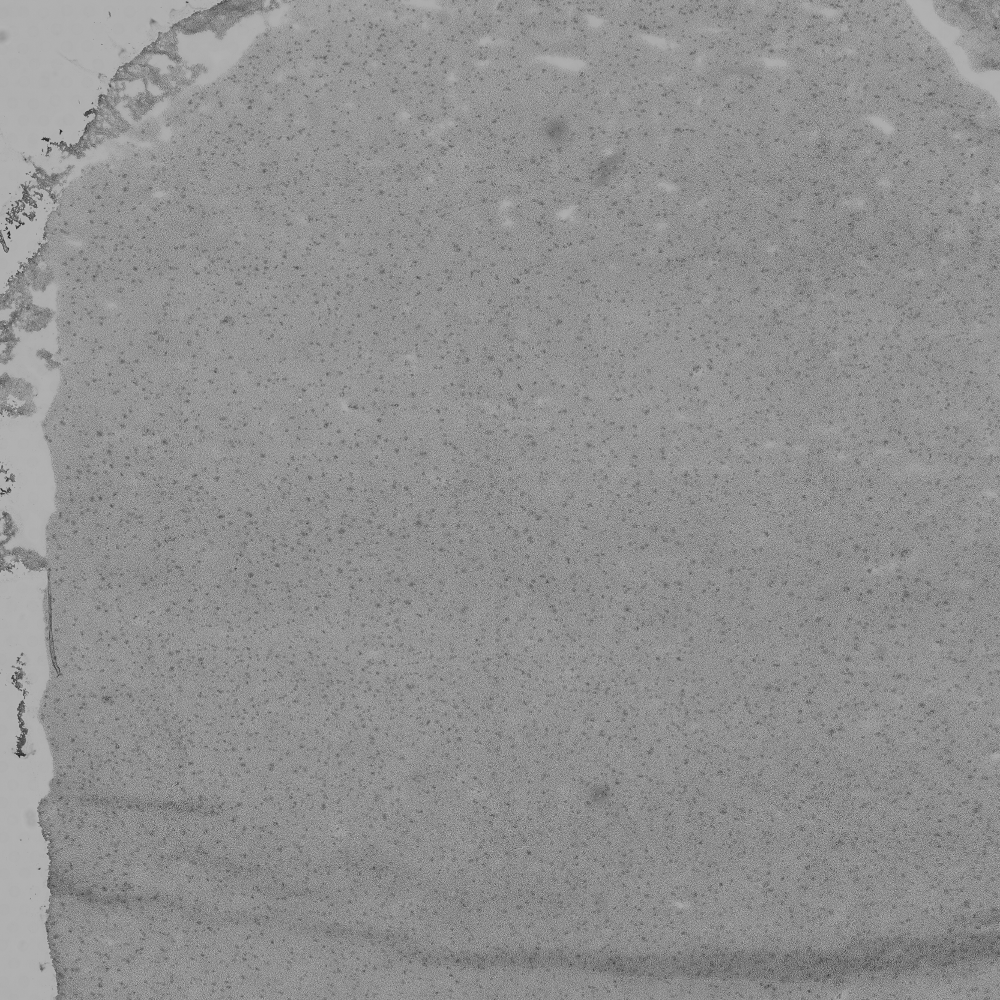

In [74]:
cv2_imshow(gray_hires)

Median Blurring

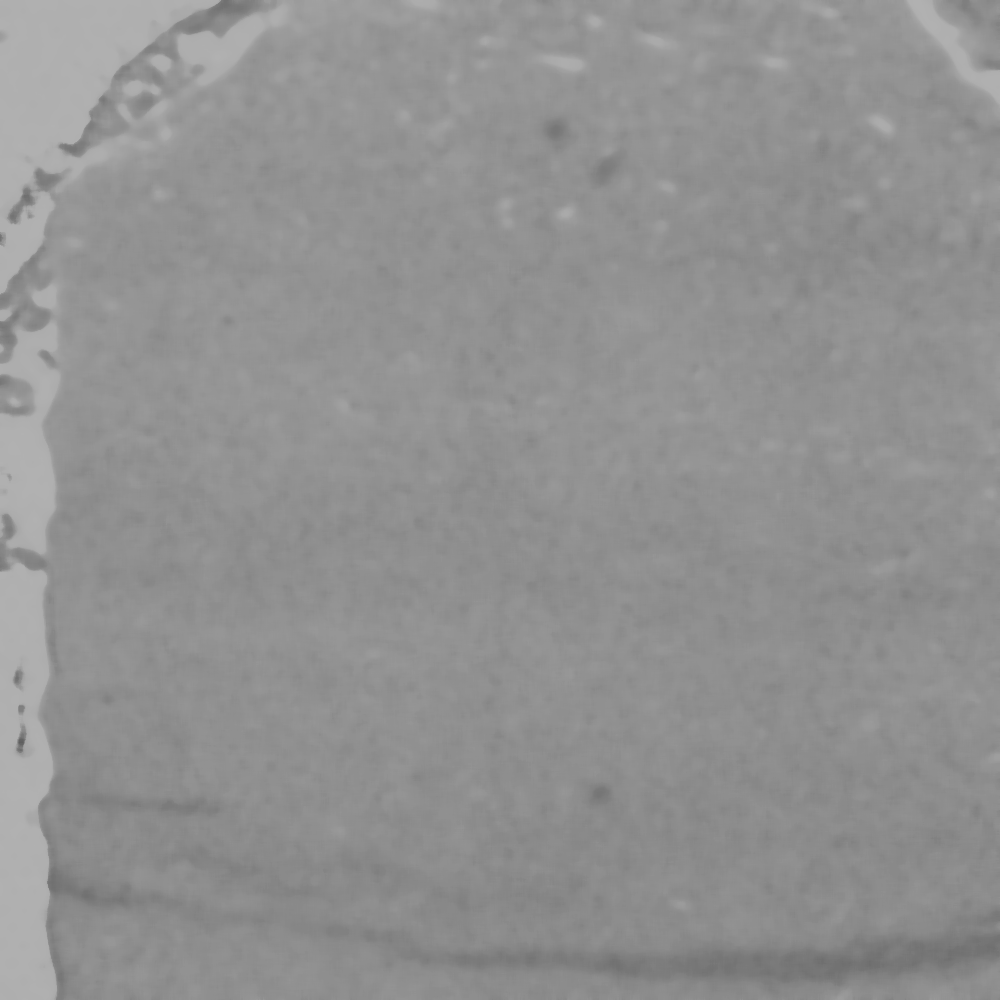

In [79]:
median_out = cv.medianBlur(gray_hires, 11)
cv2_imshow(median_out)

Subtract

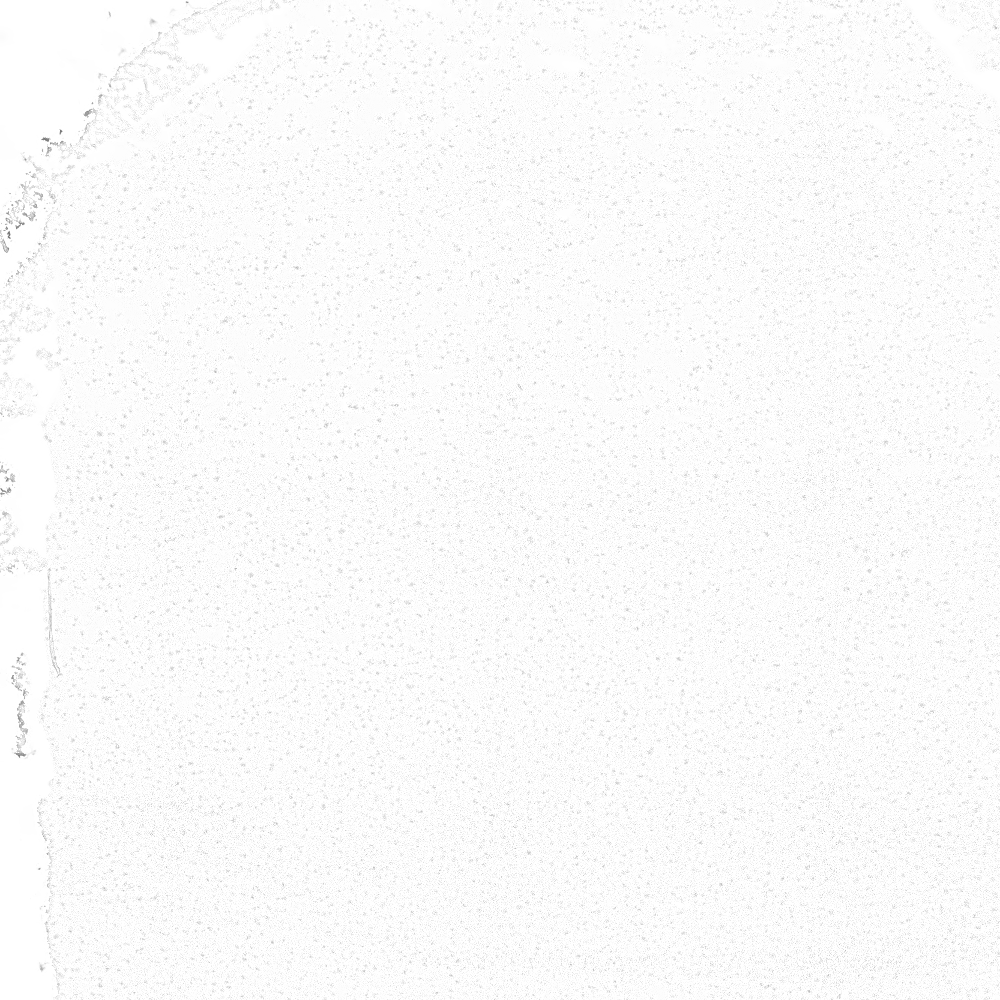

In [98]:
dst = cv.subtract(median_out, gray_hires)

dst = cv.fastNlMeansDenoising(dst,3,3,10)
#inversion
imagem = cv.bitwise_not(dst)
cv2_imshow(imagem)


Final output image 

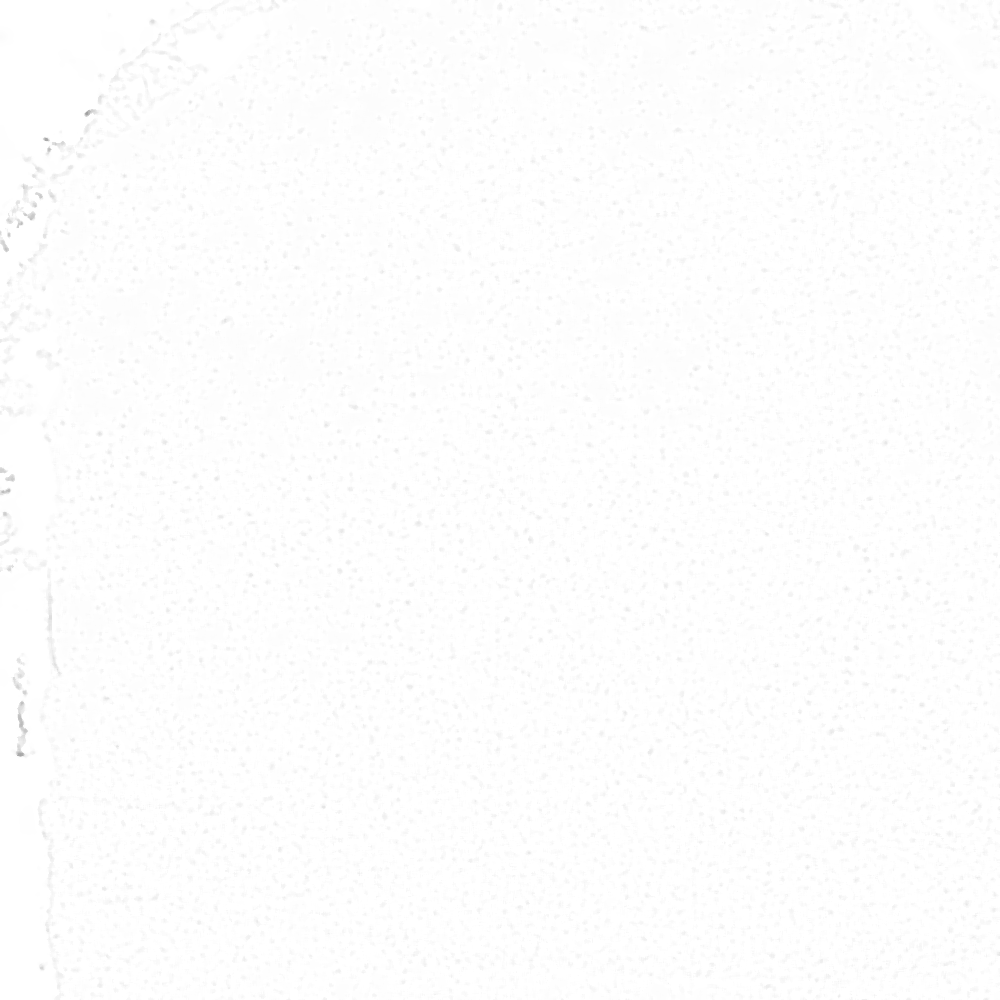

In [144]:
median_out = cv.medianBlur(imagem, 5)
cv2_imshow(median_out)

Wavelets exploration

In [123]:
(cA, cD)= pywt.dwt2(imagem, 'haar' )
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
LL, (LH, HL, HH) = (cA, cD)


Plotting

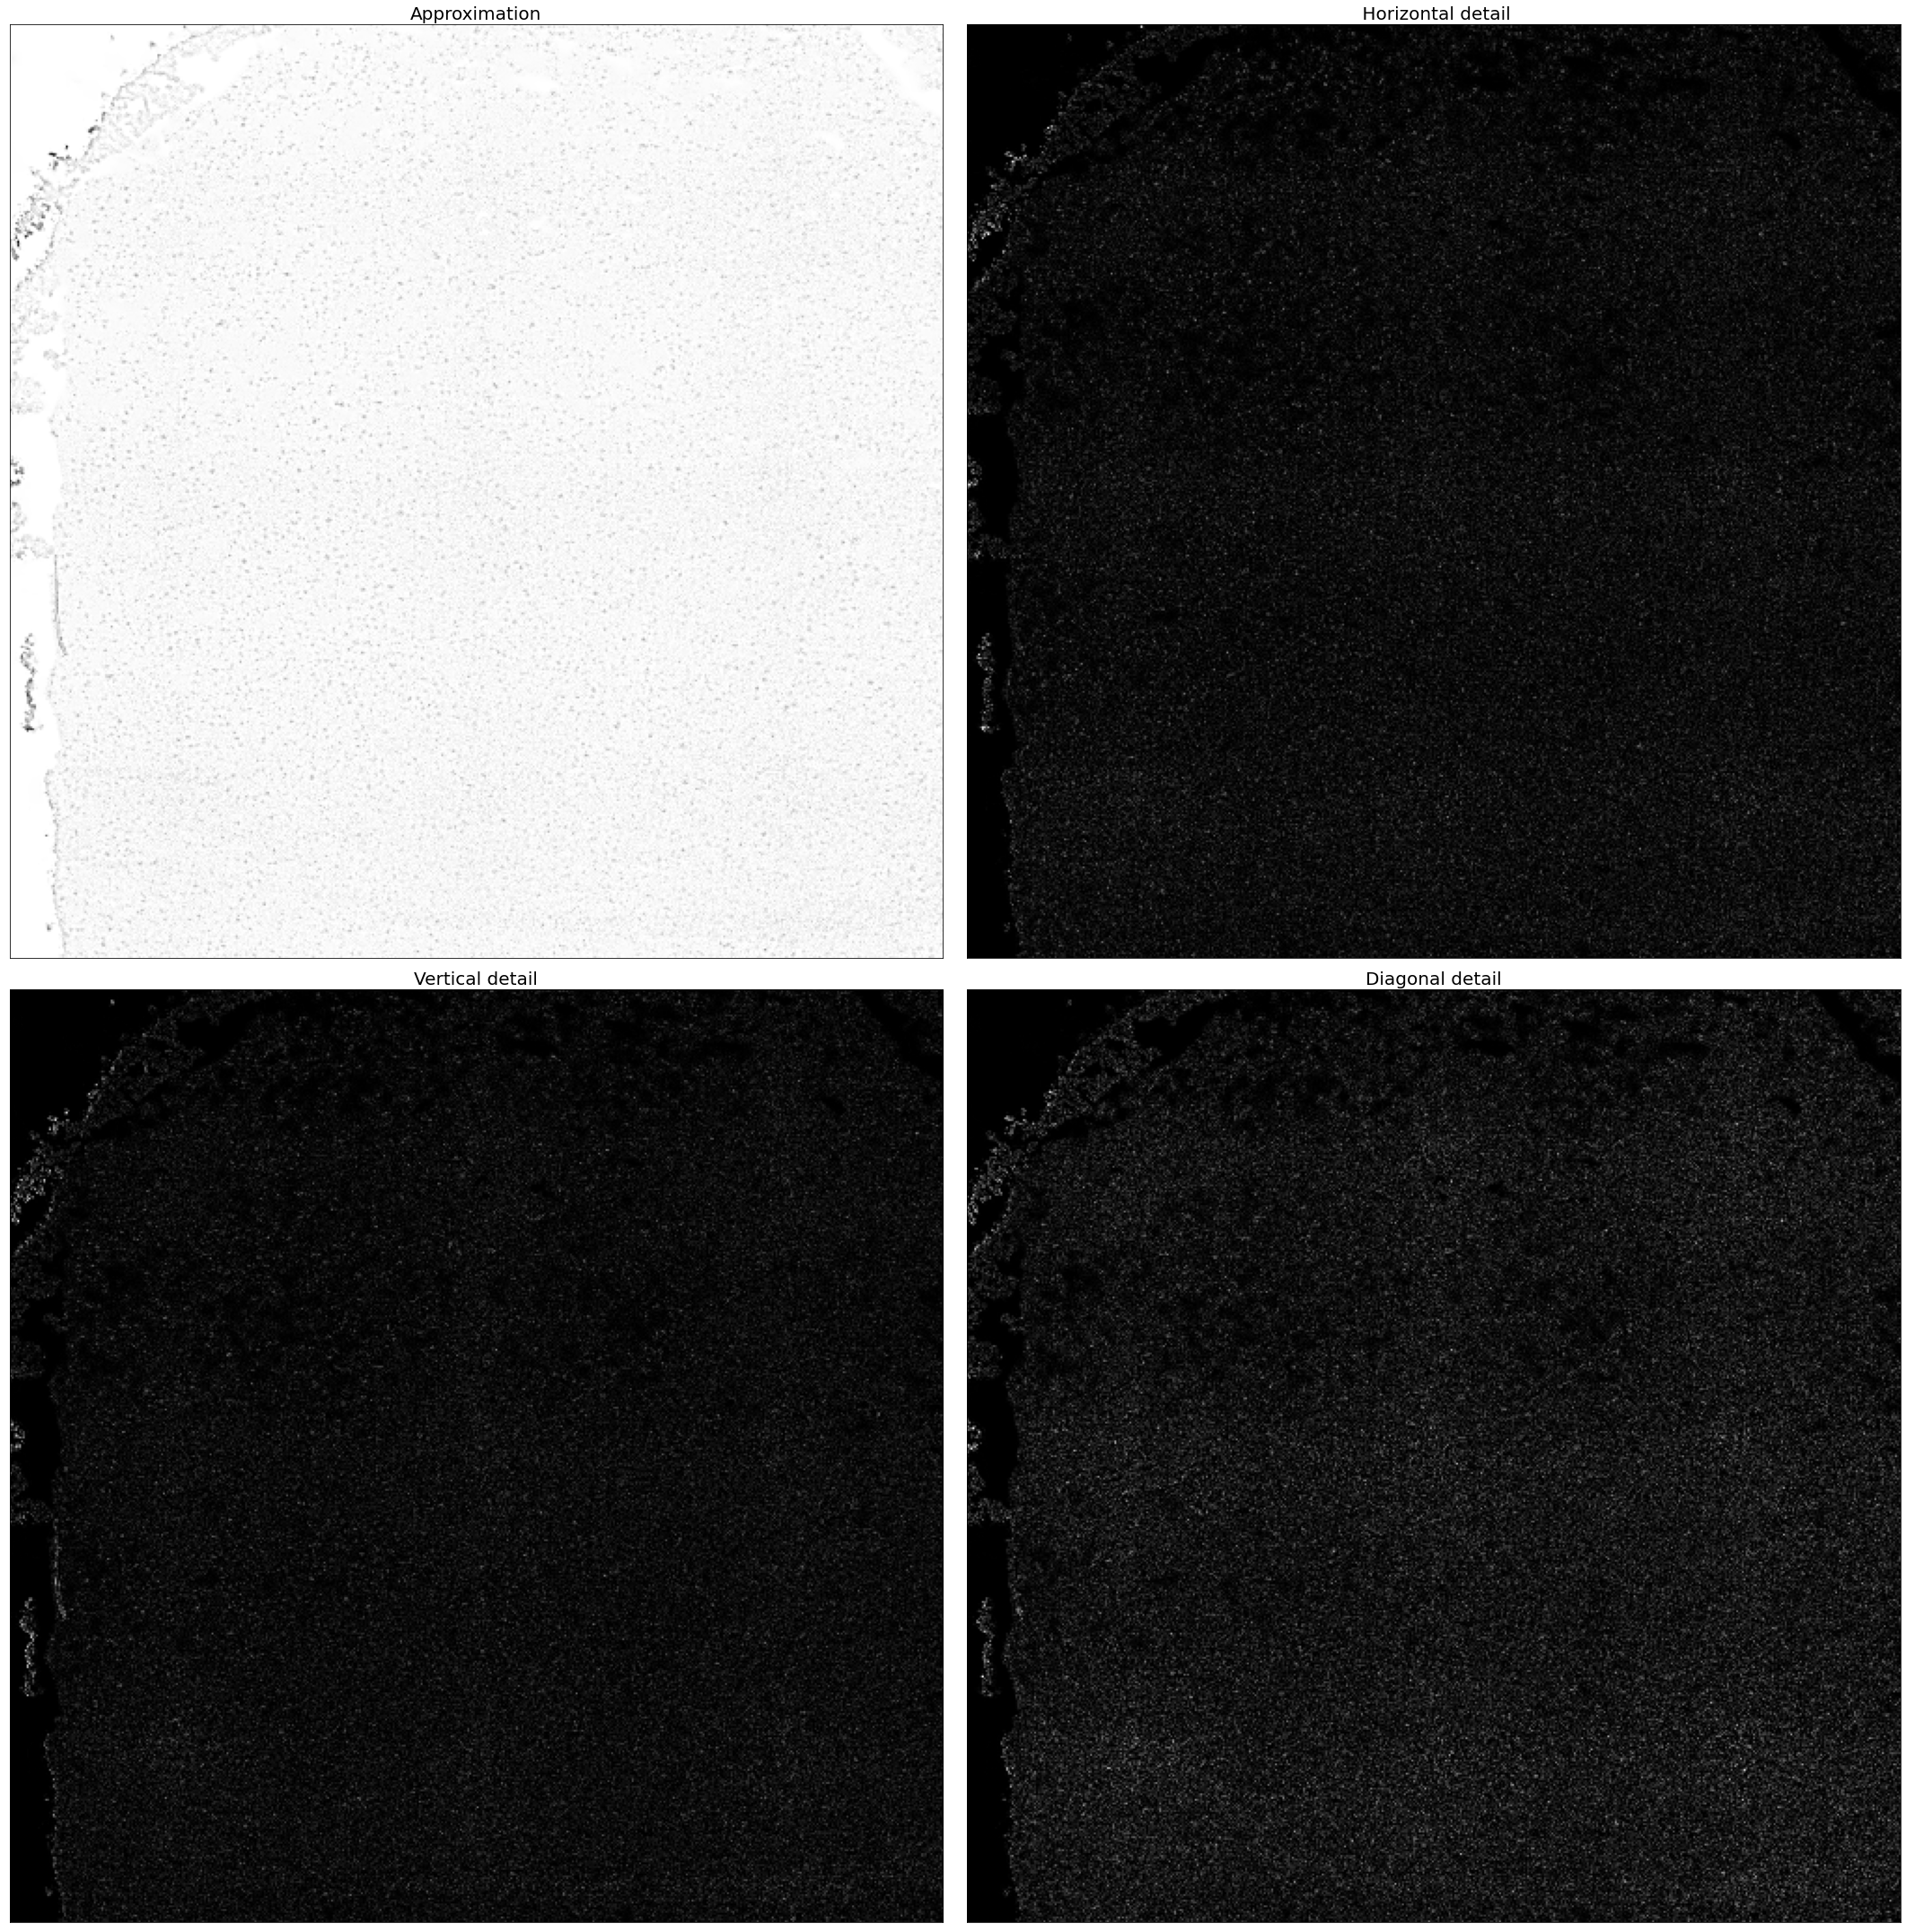

In [142]:
new_coeffs = []
fig = plt.figure(figsize=(30, 30))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
        #a= cv.medianBlur(np.float32(a), 5)
    new_coeffs.append(a)
    ax.imshow(a, cmap=plt.cm.gray) #, interpolation="nearest"
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()